/Users/chocho/Library/r-miniconda-arm64/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/Users/chocho/Library/r-miniconda-arm64/lib/python3.10/site-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


interpolation sample time step:   0%|          | 0/2 [00:00<?, ?it/s]

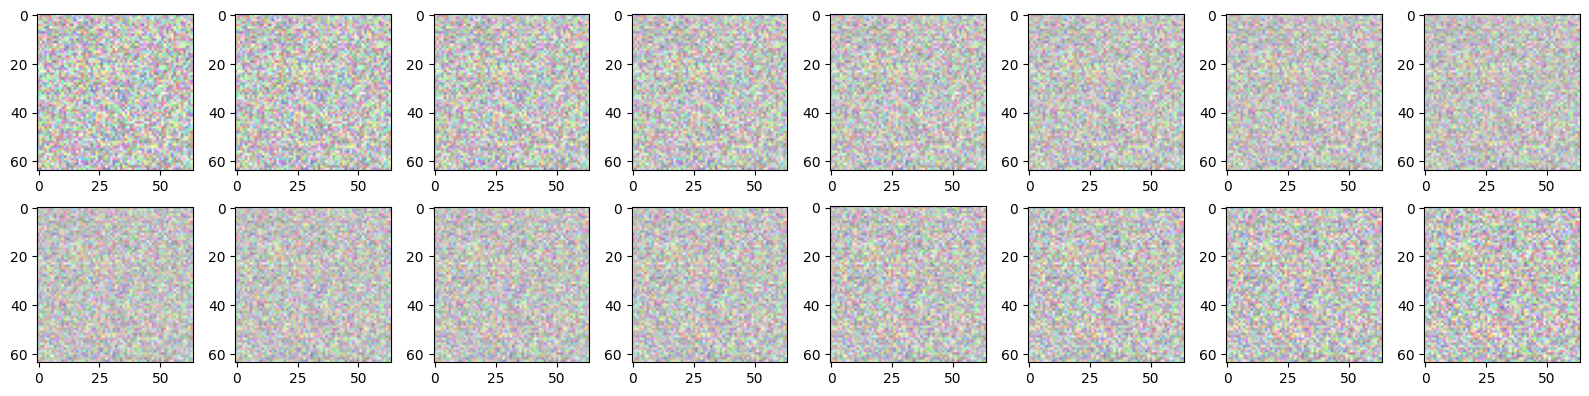

In [1]:
from denoising_diffusion_pytorch.my_denoising_diffusion_pytorch import *

model = Unet(
  dim=64,
  channels=3,
  dim_mults=(1,2,4,8),
  # flash_attn=True,
)

diffusion = GaussianDiffusion(
  model,
  image_size=64,
  timesteps=200,
  sampling_timesteps=150,
  objective='pred_v'
)

x1 = torch.rand(3,64,64)
x2 = torch.rand(3,64,64)

diffusion.interpolate_from_x1_to_x2(
  x1.unsqueeze(0),
  x2.unsqueeze(0),
  t = 2,
  save_gif = True
)

In [5]:
import torch

# 假设 x1 和 x2 是你的两个张量
x1 = torch.randint( 0, 2, (1, 3, 64, 64))
x2 = torch.randint( 0, 2, (1, 3, 64, 64))

# 定义内插点的数量，这里假设为10
num_points = 10

# 创建等差数列 lam
lam = torch.linspace(0, 1, num_points).view(-1, 1, 1, 1)

# 使用广播执行内插
x = (1 - lam) * x1 + lam * x2

print(x.shape)

torch.Size([10, 3, 64, 64])


In [4]:
x1.shape, list(x1)[0].shape

(torch.Size([3, 64, 64]), torch.Size([64, 64]))

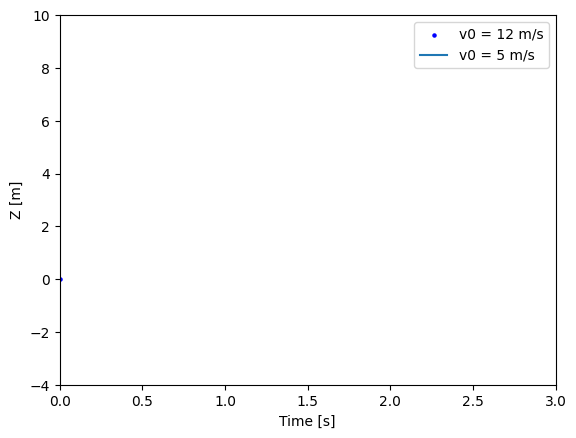

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)

ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
plt.show()
ani.save(filename="pillow_example.gif", writer="pillow")

/Users/chocho/Library/r-miniconda-arm64/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


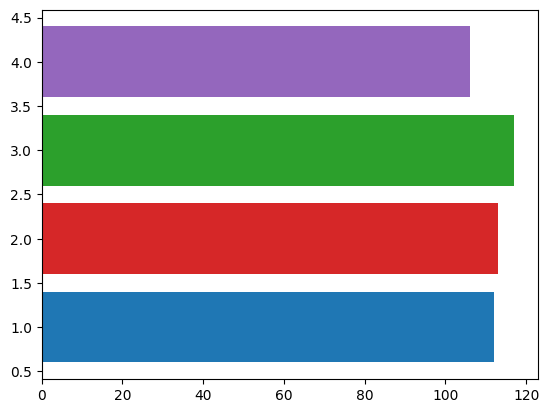

In [6]:
fig, ax = plt.subplots()
rng = np.random.default_rng(19680801)
data = np.array([20, 20, 20, 20])
x = np.array([1, 2, 3, 4])

artists = []
colors = ['tab:blue', 'tab:red', 'tab:green', 'tab:purple']
for i in range(20):
    data += rng.integers(low=0, high=10, size=data.shape)
    container = ax.barh(x, data, color=colors)
    artists.append(container)


ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()